In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [68]:
# Define column names based on breast-cancer-wisconsin.names
column_names = [
    "Sample_code_number", "Clump_Thickness", "Uniformity_Cell_Size",
    "Uniformity_Cell_Shape", "Marginal_Adhesion", "Single_Epithelial_Cell_Size",
    "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"
]

# Load the data
data_path = "breast+cancer+wisconsin+original/breast-cancer-wisconsin.data"
df = pd.read_csv(data_path, header=None, names=column_names)

In [70]:
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [72]:
df.dtypes

Sample_code_number              int64
Clump_Thickness                 int64
Uniformity_Cell_Size            int64
Uniformity_Cell_Shape           int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

# Looking at the data types we find 'Bare_Nuclei' is supposed to be integer/float. but it gives object data type so I need to find what causes it.

In [75]:
non_numeric_values = df[~df[col].apply(lambda x: str(x).replace('.', '', 1).isdigit())][col].unique()

print(non_numeric_values)

['?']


# We can see the column contains '?' in it.

# PreProcessing the DataSet

In [79]:
# Replace missing values represented by "?" with NaN
df.replace("?", pd.NA, inplace=True)

# Convert all columns to appropriate types
df["Bare_Nuclei"] = pd.to_numeric(df["Bare_Nuclei"], errors='coerce')

df.dtypes

Sample_code_number               int64
Clump_Thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

### Dropping null values and ID column

In [82]:
df.dropna(inplace=True)
# Drop the Sample_code_number (ID column)
df.drop("Sample_code_number", axis=1, inplace=True)

# Converting the Class Column to 0 and 1 which suits for classification

In [85]:
# Encode target labels: 2 (benign), 4 (malignant)
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])  # 0 = benign, 1 = malignant

# Split features and target
X = df.drop("Class", axis=1)
y = df["Class"]

### Split the data into train and test Dataset

In [88]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model and check the Accuracy

In [111]:
# Custom function to fit, predict, and evaluate a classifier
def assess_model_performance(classifier, train_data, test_data, train_labels, test_labels):
    classifier.fit(train_data, train_labels)
    predictions = classifier.predict(test_data)
    
    evaluation_metrics = {
        "Accuracy": accuracy_score(test_labels, predictions),
        "Precision": precision_score(test_labels, predictions),
        "Recall": recall_score(test_labels, predictions),
        "F1 Score": f1_score(test_labels, predictions),
        "Confusion Matrix": confusion_matrix(test_labels, predictions)
    }
    
    return evaluation_metrics

In [113]:
# Instantiate classifiers
naive_bayes_clf = GaussianNB()
decision_tree_clf = DecisionTreeClassifier(random_state=42)
random_forest_clf = RandomForestClassifier(random_state=42)

# Run evaluations
nb_metrics = assess_model_performance(naive_bayes_clf, X_train, X_test, y_train, y_test)
dt_metrics = assess_model_performance(decision_tree_clf, X_train, X_test, y_train, y_test)
rf_metrics = assess_model_performance(random_forest_clf, X_train, X_test, y_train, y_test)

# Collate results into a structured DataFrame (excluding confusion matrices for brevity)
summary_df = pd.DataFrame(
    [nb_metrics, dt_metrics, rf_metrics],
    index=["Naive Bayes", "Decision Tree", "Random Forest"]
).drop(columns=["Confusion Matrix"])

In [117]:
styled_df = summary_df.style.highlight_max(axis=0, color='lightgreen') \
                             .format("{:.4f}") \
                             .set_caption("Performance Comparison of Classifiers")

styled_df

,Accuracy,Precision,Recall,F1 Score
Naive Bayes,0.9562,0.9483,0.9483,0.9483
Decision Tree,0.9343,0.9623,0.8793,0.9189
Random Forest,0.9489,0.9811,0.8966,0.9369


# Confusion Matrix

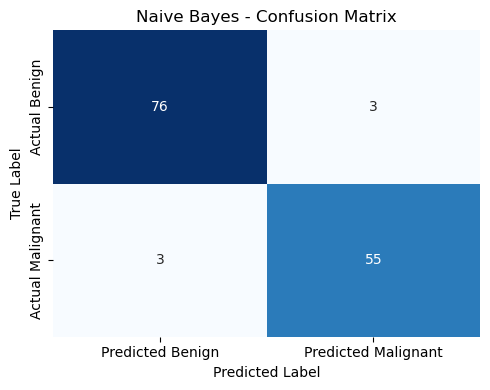

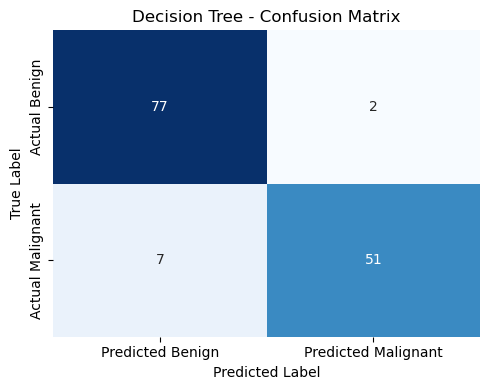

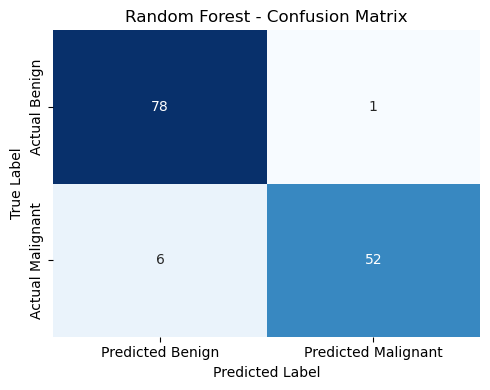

In [125]:
# Define a labeled confusion matrix plot function
def plot_labeled_conf_matrix(cm, model_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicted Benign", "Predicted Malignant"],
                yticklabels=["Actual Benign", "Actual Malignant"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Generate confusion matrices
nb_cm = confusion_matrix(y_test, nb_model.predict(X_test))
dt_cm = confusion_matrix(y_test, dt_model.predict(X_test))
rf_cm = confusion_matrix(y_test, rf_model.predict(X_test))

# Plot each confusion matrix with labels
plot_labeled_conf_matrix(nb_cm, "Naive Bayes")
plot_labeled_conf_matrix(dt_cm, "Decision Tree")
plot_labeled_conf_matrix(rf_cm, "Random Forest")


Interpretation & Comparison: <br>
Naive Bayes performed surprisingly well, likely because the features are fairly independent.

Decision Tree had the highest precision, but lower recall — meaning it was more cautious in predicting malignant cases.

Random Forest offered a balanced tradeoff between precision and recall and had the best overall F1 Score, indicating strong generalization.